In [1]:
from qiskit import * 

In [2]:
nqubits=4
circuit= QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.cx(2,3)
circuit.barrier()
circuit.measure([0,1,2,3],[0,1,2,3])

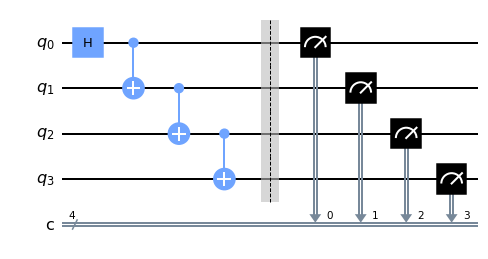

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

In [4]:
simulator=Aer.get_backend('qasm_simulator')
sim_result=execute(circuit,backend=simulator,shot=1024).result()

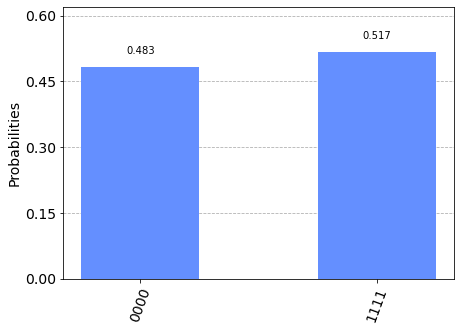

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))

In [6]:
IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
provider = IBMQ.get_provider(hub='ibm-q')


In [8]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [9]:
qcomp = provider.get_backend('ibmq_bogota')

In [10]:
job = execute(circuit, backend=qcomp, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

61a21844398b845496c29790
Job Status: job has successfully run


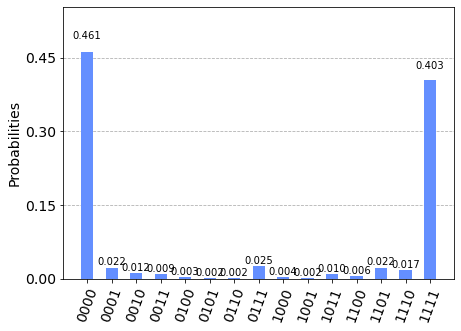

In [11]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [12]:
device_result.get_counts(circuit)

{'0000': 472,
 '0001': 23,
 '0010': 12,
 '0011': 9,
 '0100': 3,
 '0101': 2,
 '0110': 2,
 '0111': 26,
 '1000': 4,
 '1001': 2,
 '1011': 10,
 '1100': 6,
 '1101': 23,
 '1110': 17,
 '1111': 413}

In [30]:
from qiskit.ignis.mitigation.measurement import (complete_meas_fitte, CompleteMeasFitter)